In [2]:
import numpy as np
from bayspec.model.local import *
from bayspec.model.astro import *
from bayspec import DataUnit, Data, Infer, Plot

In [3]:
tbabs_ins = AS_TbAbs()

ztbabs_ins = AS_TbAbs()
ztbabs_ins.expr = 'AS_zTbAbs'

cpl_ins = cpl()
csbpl_ins = csbpl()

model1 = tbabs_ins * ztbabs_ins * (cpl_ins + csbpl_ins)
model2 = cpl_ins + csbpl_ins

In [4]:
leia = DataUnit(
    src='./leia/grb.src', 
    bkg='./leia/grb.bkg', 
    rmf='./leia/grb.rmf', 
    arf='./leia/grb.arf', 
    notc=[0.5, 4], 
    stat='cstat', 
    grpg={'min_evt': 10})

gbm_na = DataUnit(
    src='./gbm/na_pha.fits', 
    bkg='./gbm/na_bak.fits', 
    rsp='./gbm/na_resp.rsp', 
    notc=[8, 900], 
    stat='pgstat', 
    grpg={'min_sigma': 3, 'max_bin': 10})

gbm_b1 = DataUnit(
    src='./gbm/b1_pha.fits', 
    bkg='./gbm/b1_bak.fits', 
    rsp='./gbm/b1_resp.rsp', 
    notc=[300, 38000], 
    stat='pgstat', 
    grpg={'min_sigma': 3, 'max_bin': 10})

gecamb_hg = DataUnit(
    src='./gecam/b/hg_pha.fits', 
    bkg='./gecam/b/hg_bak.fits', 
    rsp='./gecam/b/hg_resp.rsp', 
    notc=[40, 350], 
    stat='pgstat', 
    grpg={'min_sigma': 3, 'max_bin': 10})

gecamb_lg = DataUnit(
    src='./gecam/b/lg_pha.fits', 
    bkg='./gecam/b/lg_bak.fits', 
    rsp='./gecam/b/lg_resp.rsp', 
    notc=[700, 6000], 
    stat='pgstat', 
    grpg={'min_sigma': 3, 'max_bin': 10})

data1 = Data([('leia', leia)])

data2 = Data([('gbm_na', gbm_na), 
              ('gbm_b1', gbm_b1), 
              ('gecamb_hg', gecamb_hg), 
              ('gecamb_lg', gecamb_lg)])

/Users/jyang/Documents/python_works/bayspec/bayspec/data/spectrum.py:184: UserWarning: ./leia/grb.src -> src error is not specified and will default to Poisson error
  warnings.warn(f'{src_file} -> src error is not specified and will default to Poisson error')
/Users/jyang/Documents/python_works/bayspec/bayspec/data/spectrum.py:313: UserWarning: ./leia/grb.bkg -> bkg error is not specified and will default to Poisson error
  warnings.warn(f'{bkg_file} -> bkg error is not specified and will default to Poisson error')


In [5]:
infer = Infer([(data1, model1), (data2, model2)])
print(infer)

╒════════╤════════════════════════════════════╤═════════════╤═════════════╤═════════╕
│  cfg#  │             Expression             │  Component  │  Parameter  │  Value  │
╞════════╪════════════════════════════════════╪═════════════╪═════════════╪═════════╡
│   1    │ ((AS_TbAbs*AS_zTbAbs)*(cpl+csbpl)) │  AS_TbAbs   │  redshift   │    0    │
├────────┼────────────────────────────────────┼─────────────┼─────────────┼─────────┤
│   2    │ ((AS_TbAbs*AS_zTbAbs)*(cpl+csbpl)) │  AS_zTbAbs  │  redshift   │    0    │
├────────┼────────────────────────────────────┼─────────────┼─────────────┼─────────┤
│   3    │ ((AS_TbAbs*AS_zTbAbs)*(cpl+csbpl)) │     cpl     │  redshift   │    0    │
├────────┼────────────────────────────────────┼─────────────┼─────────────┼─────────┤
│   4    │ ((AS_TbAbs*AS_zTbAbs)*(cpl+csbpl)) │    csbpl    │  redshift   │    0    │
├────────┼────────────────────────────────────┼─────────────┼─────────────┼─────────┤
│   5    │            (cpl+csbpl)             │     cp

In [6]:
infer.cfg[2].val = 0.065
print(infer.cfg_info)

╒════════╤════════════════════════════════════╤═════════════╤═════════════╤═════════╕
│  cfg#  │             Expression             │  Component  │  Parameter  │  Value  │
╞════════╪════════════════════════════════════╪═════════════╪═════════════╪═════════╡
│   1    │ ((AS_TbAbs*AS_zTbAbs)*(cpl+csbpl)) │  AS_TbAbs   │  redshift   │    0    │
├────────┼────────────────────────────────────┼─────────────┼─────────────┼─────────┤
│   2    │ ((AS_TbAbs*AS_zTbAbs)*(cpl+csbpl)) │  AS_zTbAbs  │  redshift   │  0.065  │
├────────┼────────────────────────────────────┼─────────────┼─────────────┼─────────┤
│   3    │ ((AS_TbAbs*AS_zTbAbs)*(cpl+csbpl)) │     cpl     │  redshift   │    0    │
├────────┼────────────────────────────────────┼─────────────┼─────────────┼─────────┤
│   4    │ ((AS_TbAbs*AS_zTbAbs)*(cpl+csbpl)) │    csbpl    │  redshift   │    0    │
├────────┼────────────────────────────────────┼─────────────┼─────────────┼─────────┤
│   5    │            (cpl+csbpl)             │     cp

In [7]:
infer.par[1].val = 0.126
infer.par[1].frozen = True

infer.par[2].val = 0.392
infer.par[2].frozen = True

infer.par[4].frozen_at(1.72)
infer.par[6].frozen_at(1.5)
infer.par[8].frozen_at(0.87)

print(infer.par_info)

╒════════╤════════════════════════════════════╤═════════════╤══════════════╤═════════╤═════════════╕
│  par#  │             Expression             │  Component  │  Parameter   │  Value  │    Prior    │
╞════════╪════════════════════════════════════╪═════════════╪══════════════╪═════════╪═════════════╡
│   1    │ ((AS_TbAbs*AS_zTbAbs)*(cpl+csbpl)) │  AS_TbAbs   │      NH      │  0.126  │   frozen    │
├────────┼────────────────────────────────────┼─────────────┼──────────────┼─────────┼─────────────┤
│   2    │ ((AS_TbAbs*AS_zTbAbs)*(cpl+csbpl)) │  AS_zTbAbs  │      NH      │  0.392  │   frozen    │
├────────┼────────────────────────────────────┼─────────────┼──────────────┼─────────┼─────────────┤
│   3*   │ ((AS_TbAbs*AS_zTbAbs)*(cpl+csbpl)) │     cpl     │   $\alpha$   │   -1    │ unif(-8, 4) │
├────────┼────────────────────────────────────┼─────────────┼──────────────┼─────────┼─────────────┤
│   4    │ ((AS_TbAbs*AS_zTbAbs)*(cpl+csbpl)) │     cpl     │  log$E_{c}$  │  1.72   │   fr

In [8]:
print(infer.free_par_info)

╒════════╤════════════════════════════════════╤═════════════╤══════════════╤═════════╤═════════════╕
│  par#  │             Expression             │  Component  │  Parameter   │  Value  │    Prior    │
╞════════╪════════════════════════════════════╪═════════════╪══════════════╪═════════╪═════════════╡
│   3    │ ((AS_TbAbs*AS_zTbAbs)*(cpl+csbpl)) │     cpl     │   $\alpha$   │   -1    │ unif(-8, 4) │
├────────┼────────────────────────────────────┼─────────────┼──────────────┼─────────┼─────────────┤
│   5    │ ((AS_TbAbs*AS_zTbAbs)*(cpl+csbpl)) │     cpl     │    log$A$    │   -1    │ unif(-6, 5) │
├────────┼────────────────────────────────────┼─────────────┼──────────────┼─────────┼─────────────┤
│   7    │ ((AS_TbAbs*AS_zTbAbs)*(cpl+csbpl)) │    csbpl    │ $\alpha_{2}$ │   -1    │ unif(-2, 2) │
├────────┼────────────────────────────────────┼─────────────┼──────────────┼─────────┼─────────────┤
│   9    │ ((AS_TbAbs*AS_zTbAbs)*(cpl+csbpl)) │    csbpl    │  log$E_{p}$  │    3    │ unif

In [9]:
post = infer.multinest(nlive=300, resume=True, savepath='./multinest')

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  300
 dimensionality =    5
 resuming from previous job
 *****************************************************
 Starting MultiNest
Acceptance Rate:                        0.350386
Replacements:                               8438
Total Samples:                             24082
Nested Sampling ln(Z):               -311.144548
Importance Nested Sampling ln(Z):    -311.958087 +/-  0.031184
  analysing data from ./multinest/1-.txt
 ln(ev)=  -310.93032873541750      +/-  0.28164807662454250     
 Total Likelihood Evaluations:        24082
 Sampling finished. Exiting MultiNest


In [10]:
print(post)

╒════════╤════════════════════════════════════╤═════════════╤══════════════╤════════╤══════════╤════════╤══════════════════╕
│  par#  │             Expression             │  Component  │  Parameter   │  Mean  │  Median  │  Best  │    1sigma CI     │
╞════════╪════════════════════════════════════╪═════════════╪══════════════╪════════╪══════════╪════════╪══════════════════╡
│   3    │ ((AS_TbAbs*AS_zTbAbs)*(cpl+csbpl)) │     cpl     │   $\alpha$   │ -1.243 │  -1.241  │ -1.237 │ [-1.273, -1.212] │
├────────┼────────────────────────────────────┼─────────────┼──────────────┼────────┼──────────┼────────┼──────────────────┤
│   5    │ ((AS_TbAbs*AS_zTbAbs)*(cpl+csbpl)) │     cpl     │    log$A$    │ -0.816 │  -0.812  │  -0.8  │ [-0.871, -0.758] │
├────────┼────────────────────────────────────┼─────────────┼──────────────┼────────┼──────────┼────────┼──────────────────┤
│   7    │ ((AS_TbAbs*AS_zTbAbs)*(cpl+csbpl)) │    csbpl    │ $\alpha_{2}$ │ -1.386 │  -1.387  │ -1.385 │ [-1.412, -1.359] │


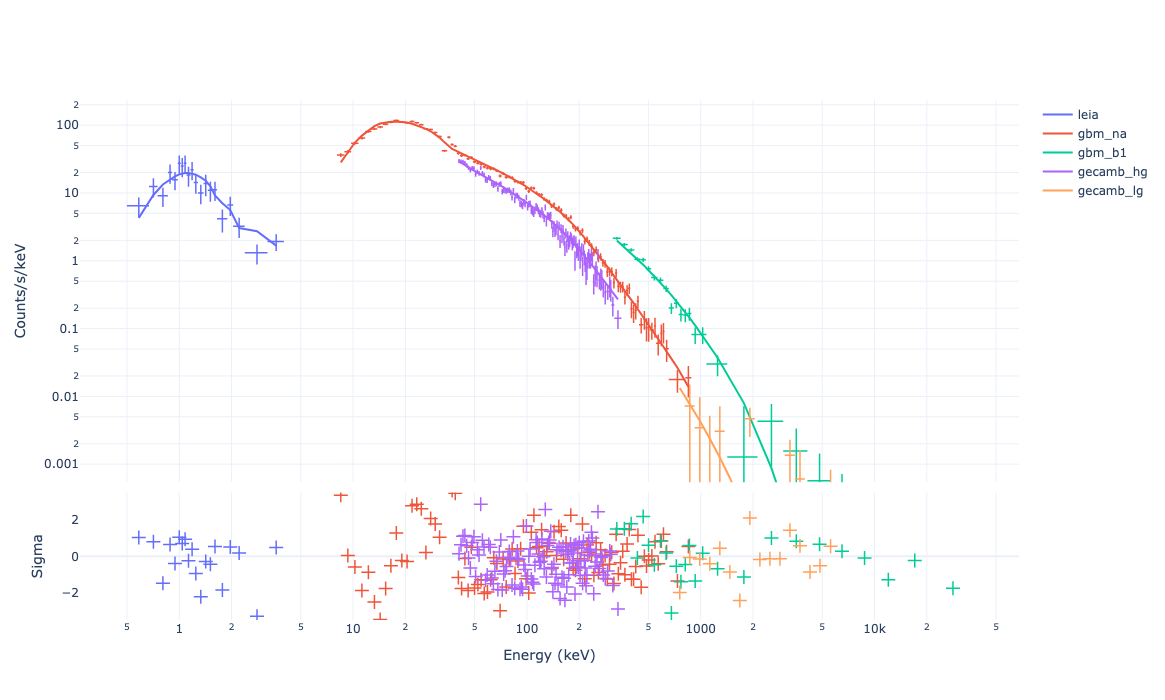

In [11]:
plot = Plot.from_posterior(post)
plot.ctsspec(style='CE')

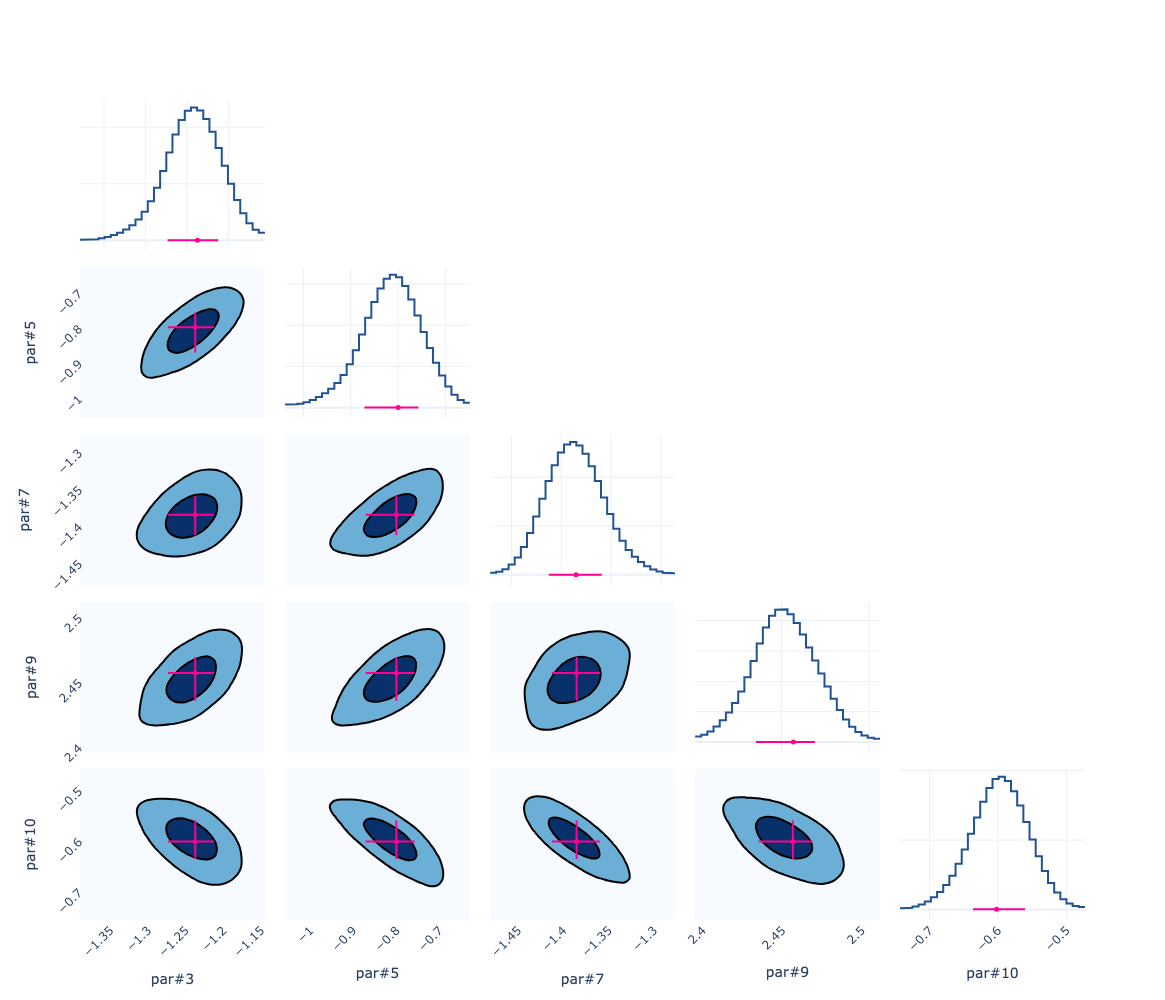

In [12]:
plot.corner()

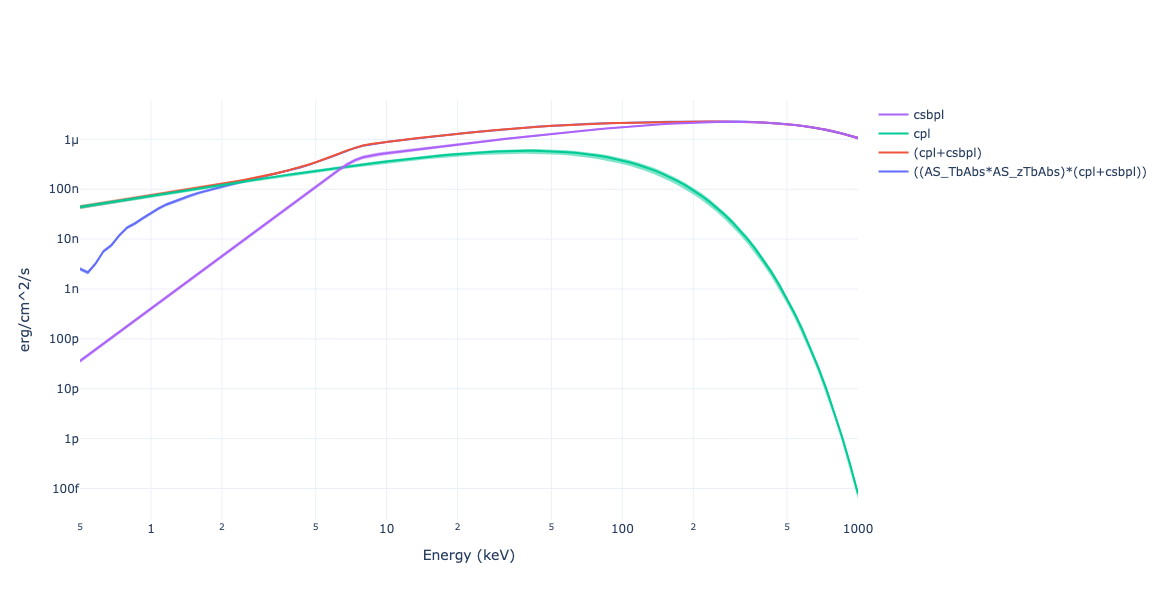

In [13]:
post.at_par(post.par_best_ci())
E = np.logspace(np.log10(0.5), 3, 100)

plot = Plot.from_model([model1, model2, cpl_ins, csbpl_ins])
plot.model(E, ploter='plotly', style='vFv', CI=True)

In [14]:
post = infer.emcee(nstep=1000, resume=True, savepath='./emcee')

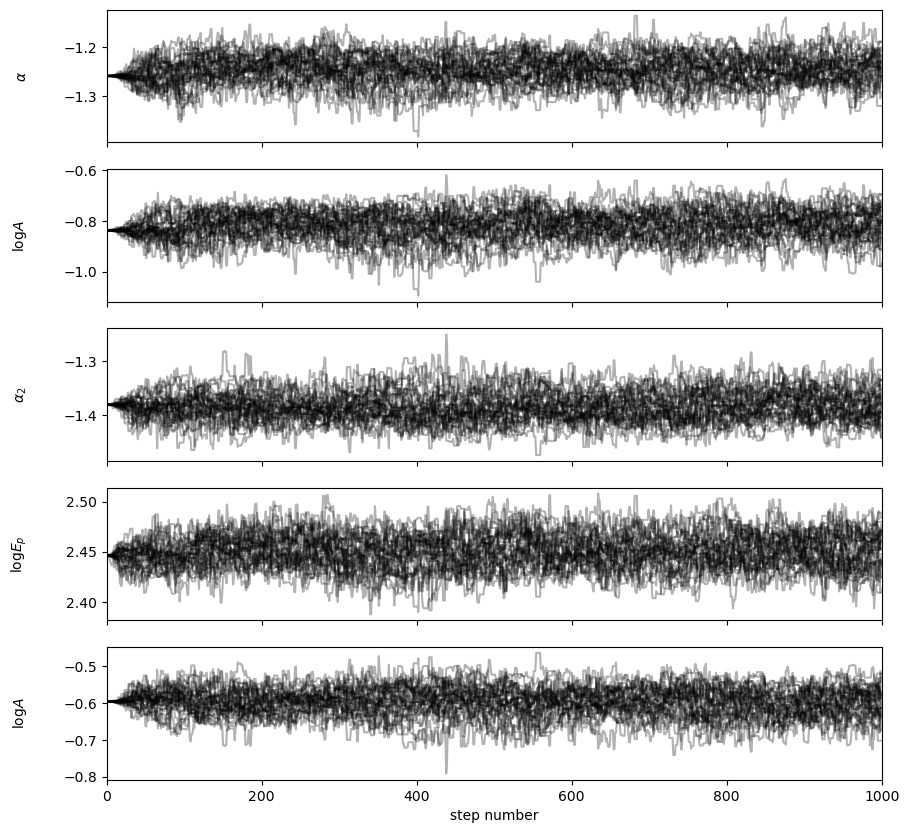

In [15]:
plot = Plot.from_posterior(post)
plot.walker()